In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start = '2014-01-01'
end = '2024-06-29'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)

In [7]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.624825,27.739730,27.504212,27.682899,73129082
1,2014-01-03,27.423307,27.719380,27.421570,27.671483,66917888
2,2014-01-06,27.729057,27.767275,27.459043,27.622094,71037271
3,2014-01-07,28.263624,28.284224,27.824357,27.919655,102486711
4,2014-01-08,28.322445,28.473584,28.125393,28.440825,90036218
...,...,...,...,...,...,...
2635,2024-06-24,180.347717,181.634570,179.789090,180.836524,18198300
2636,2024-06-25,185.126007,185.295589,180.661948,180.701859,18917700
2637,2024-06-26,184.916504,185.475131,183.539890,183.749368,13375700


In [8]:
ma_100_days = data.Close.rolling(100).mean()

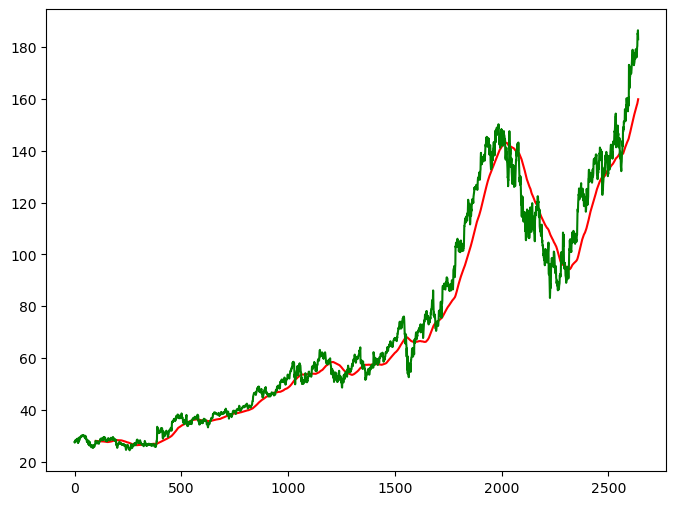

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
ma_200_days = data.Close.rolling(200).mean()

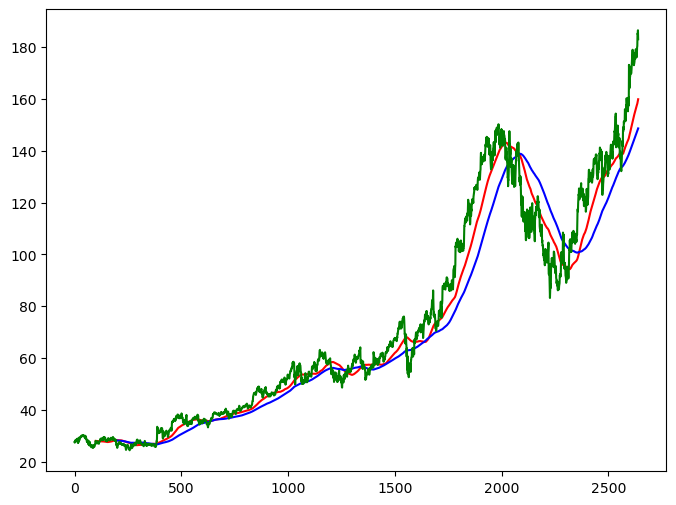

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
data.dropna(inplace=True)

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape[0]

2112

In [15]:
data_test.shape[0]

528

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [19]:
x, y = np.array(x), np.array(y)

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\chand\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - loss: 0.0540
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0069
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0055
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - loss: 0.0048
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - loss: 0.0052
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0040
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 0.0039
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0042
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0033
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0035
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0034
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0033
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0030
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 0.0031
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step -

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [27]:
data_test_scale  =  scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
print(x)
x, y = np.array(x), np.array(y)

[array([[0.60835001],
       [0.60350368],
       [0.59073123],
       [0.5945446 ],
       [0.58819223],
       [0.52290139],
       [0.52191175],
       [0.5166358 ],
       [0.53178803],
       [0.54572368],
       [0.56146461],
       [0.53716525],
       [0.54349352],
       [0.50974278],
       [0.50357861],
       [0.48286569],
       [0.4499016 ],
       [0.45260484],
       [0.4174976 ],
       [0.44167639],
       [0.44052739],
       [0.48077065],
       [0.50402759],
       [0.52507345],
       [0.62314003],
       [0.57114307],
       [0.57467156],
       [0.53530217],
       [0.53795693],
       [0.55958231],
       [0.53206301],
       [0.48888512],
       [0.50018036],
       [0.51104613],
       [0.52129881],
       [0.47130005],
       [0.45352662],
       [0.44324497],
       [0.42569878],
       [0.47482366],
       [0.49264528],
       [0.49623172],
       [0.48925191],
       [0.49488505],
       [0.49060361],
       [0.46949951],
       [0.41488136],
       [0.42

In [29]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


In [30]:
scale =1/scaler.scale_

In [31]:
y_predict = y_predict*scale

In [32]:
y = y*scale

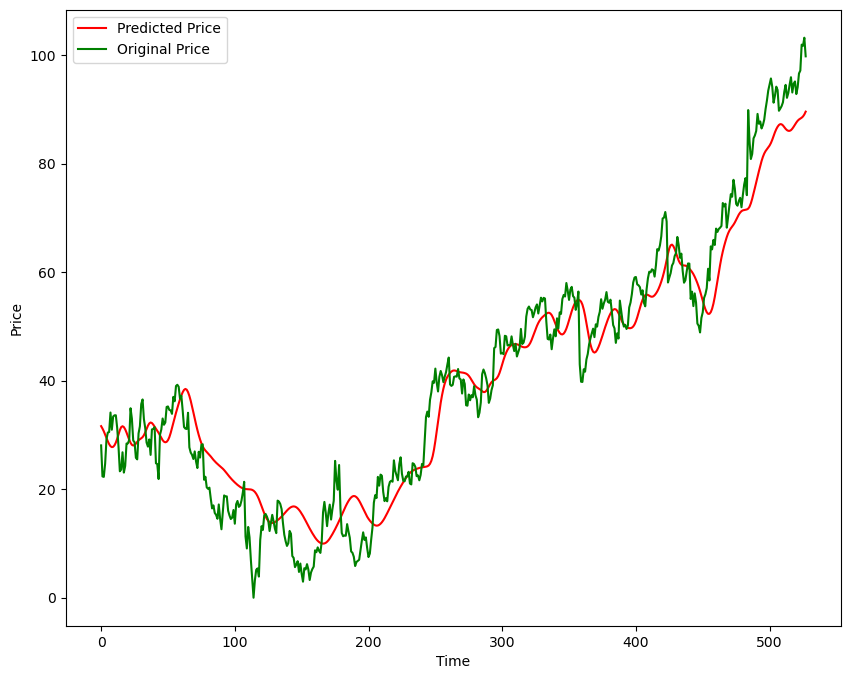

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
model.save('Stock Predictions Model.keras')